In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import cv2
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
"""
Determine if any GPUs are available
"""
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

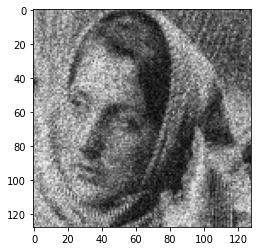

In [ ]:
image = cv2.resize(cv2.imread('person.png'), (128, 128))
image_tensor = torch.Tensor(image).permute(2, 0, 1)/255
plt.imshow(image_tensor.permute(1, 2, 0))
plt.show()

In [ ]:
class Hourglass_net(nn.Module):
    def __init__(self):
        super(Hourglass_net, self).__init__()

        self.leaky_relu = nn.LeakyReLU()

        self.conv_1 = nn.Conv2d(3, 8, 5, stride=2, padding=2)
        self.bn_1 = nn.BatchNorm2d(8)

        self.conv_2 = nn.Conv2d(8, 16, 5, stride=2, padding=2)
        self.bn_2 = nn.BatchNorm2d(16)
        self.skip_conv_2 = nn.Conv2d(16, 5, 5, stride=1, padding=2)

        self.conv_3 = nn.Conv2d(16, 32, 5, stride=2, padding=2)
        self.bn_3 = nn.BatchNorm2d(32)
        self.skip_conv_3 = nn.Conv2d(32, 5, 5, stride=1, padding=2)

        self.conv_4 = nn.Conv2d(32, 64, 5, stride=2, padding=2)
        self.bn_4 = nn.BatchNorm2d(64)
        self.skip_conv_4 = nn.Conv2d(64, 5, 5, stride=1, padding=2)

        self.conv_5 = nn.Conv2d(64, 128, 5, stride=2, padding=2)
        self.bn_5 = nn.BatchNorm2d(128)
        self.skip_conv_5 = nn.Conv2d(128, 5, 5, stride=1, padding=2)

        self.conv_6 = nn.Conv2d(128, 256, 5, stride=2, padding=2)
        self.bn_6 = nn.BatchNorm2d(256)

        self.upconv_5 = nn.ConvTranspose2d(256, 123, 4, stride=2, padding=1)
        self.upbn_5 = nn.BatchNorm2d(128)

        self.upconv_4 = nn.ConvTranspose2d(128, 59, 4, stride=2, padding=1)
        self.upbn_4 = nn.BatchNorm2d(64)

        self.upconv_3 = nn.ConvTranspose2d(64, 27, 4, stride=2, padding=1)
        self.upbn_3 = nn.BatchNorm2d(32)

        self.upconv_2 = nn.ConvTranspose2d(32, 11, 4, stride=2, padding=1)
        self.upbn_2 = nn.BatchNorm2d(16)

        self.upconv_1 = nn.ConvTranspose2d(16, 8, 4, stride=2, padding=1)
        self.upbn_1 = nn.BatchNorm2d(8)

        self.out_conv = nn.ConvTranspose2d(8, 3, 4, stride=2, padding=1)
        self.out_bn = nn.BatchNorm2d(3)

    def forward(self, z):
        x = self.leaky_relu(self.bn_1(self.conv_1(z)))
        
        x = self.leaky_relu(self.bn_2(self.conv_2(x)))
        skip_2 = self.skip_conv_2(x)

        x = self.leaky_relu(self.bn_3(self.conv_3(x)))
        skip_3 = self.skip_conv_3(x)

        x = self.leaky_relu(self.bn_4(self.conv_4(x)))
        skip_4 = self.skip_conv_4(x)

        x = self.leaky_relu(self.bn_5(self.conv_5(x)))
        skip_5 = self.skip_conv_5(x)

        x = self.leaky_relu(self.bn_6(self.conv_6(x)))

        x = torch.cat([self.upconv_5(x), skip_5], dim=1)
        x = self.leaky_relu(self.upbn_5(x))

        x = torch.cat([self.upconv_4(x), skip_4], dim=1)
        x = self.leaky_relu(self.upbn_4(x))

        x = torch.cat([self.upconv_3(x), skip_3], dim=1)
        x = self.leaky_relu(self.upbn_3(x))

        x = torch.cat([self.upconv_2(x), skip_2], dim=1)
        x = self.leaky_relu(self.upbn_2(x))

        x = self.leaky_relu(self.upbn_1(self.upconv_1(x)))

        out = nn.Sigmoid()(self.out_bn(self.out_conv(x)))

        return out

In [ ]:
net = Hourglass_net()
# net = net.to(device)
x = torch.randn(1, 3, 128, 128)
print(net(x).shape)

torch.Size([1, 3, 128, 128])


In [ ]:
iterations = 4000
criterion = nn.MSELoss()
lr = 1e-1
optimizer = optim.SGD(net.parameters(), lr=lr)

  0%|          | 0/4000 [00:00<?, ?it/s]

Loss is 0.08786782622337341


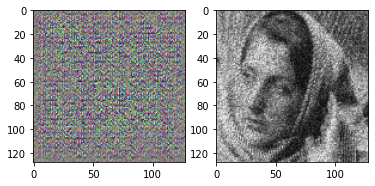

Loss is 0.04014873877167702


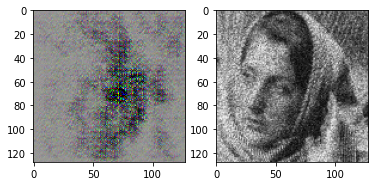

Loss is 0.024427928030490875


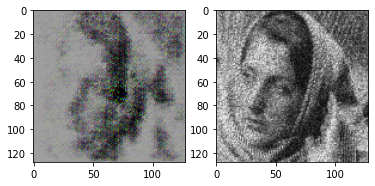

Loss is 0.01932358182966709


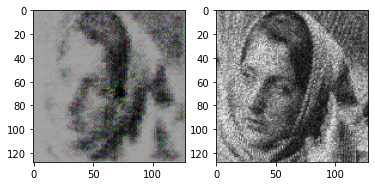

Loss is 0.01688397116959095


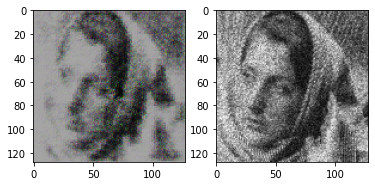

Loss is 0.015461700968444347


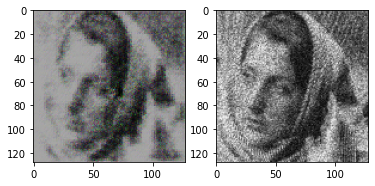

Loss is 0.014553708024322987


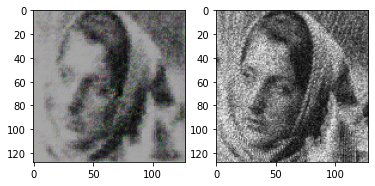

Loss is 0.013850967399775982


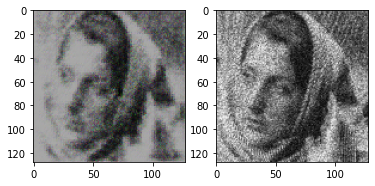

Loss is 0.013297401368618011


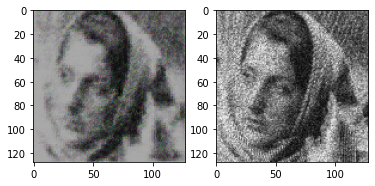

Loss is 0.012839581817388535


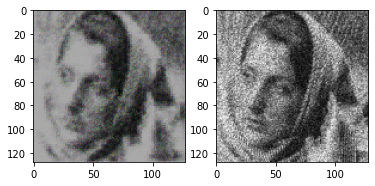

Loss is 0.012452910654246807


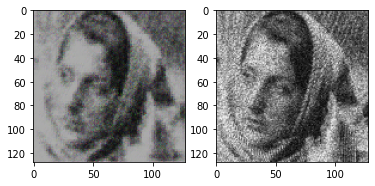

Loss is 0.012095890007913113


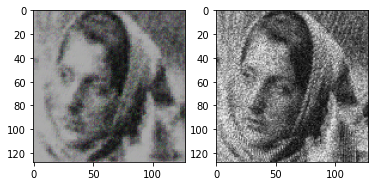

Loss is 0.011808873154222965


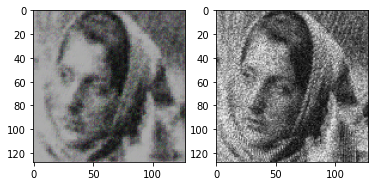

Loss is 0.01153111457824707


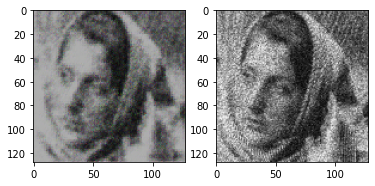

Loss is 0.011281602084636688


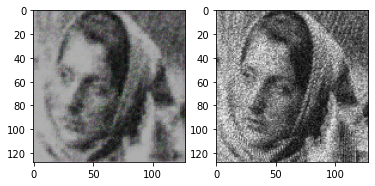

Loss is 0.011054199188947678


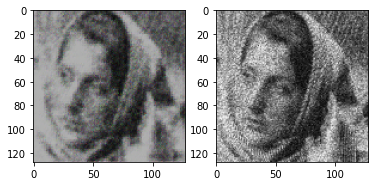

Loss is 0.010839532129466534


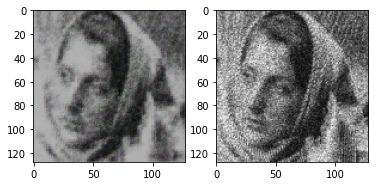

Loss is 0.010654628276824951


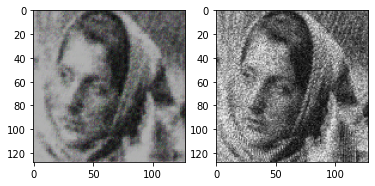

Loss is 0.010460729710757732


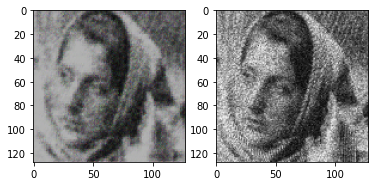

Loss is 0.010294950567185879


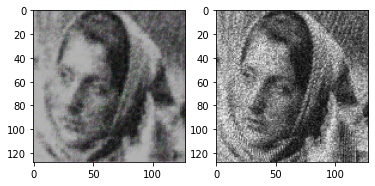

Loss is 0.010134982876479626


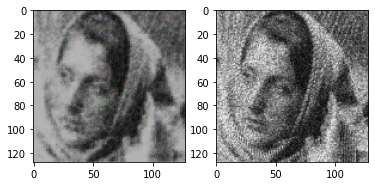

Loss is 0.01000587921589613


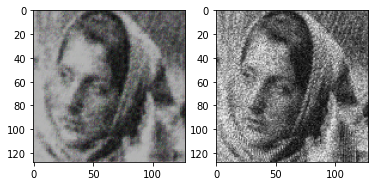

Loss is 0.009871387854218483


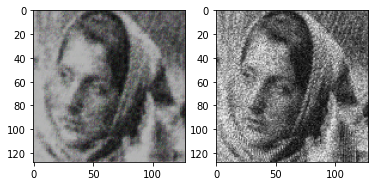

Loss is 0.009725775569677353


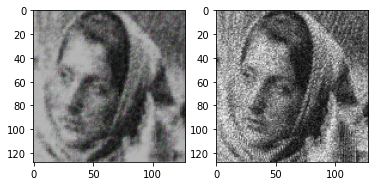

Loss is 0.009591817855834961


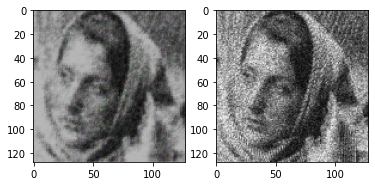

Loss is 0.009480130858719349


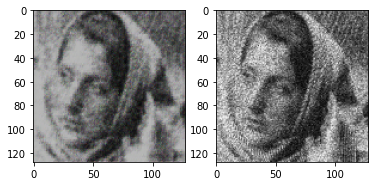

Loss is 0.009357433766126633


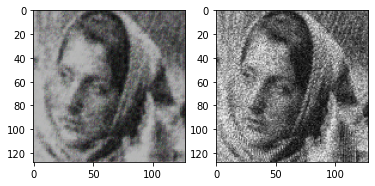

Loss is 0.009260129183530807


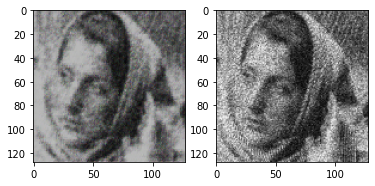

Loss is 0.009136228822171688


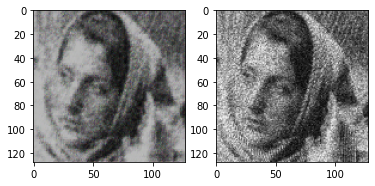

Loss is 0.009015794843435287


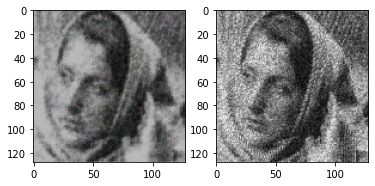

Loss is 0.00892109889537096


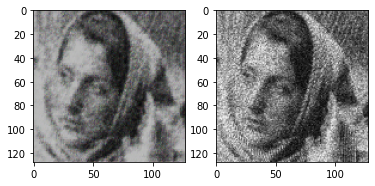

Loss is 0.008793873712420464


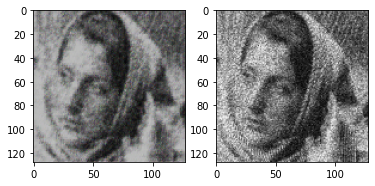

Loss is 0.008703685365617275


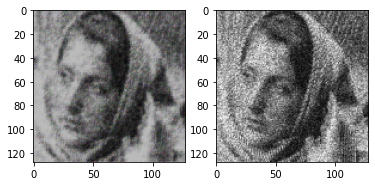

Loss is 0.008596793748438358


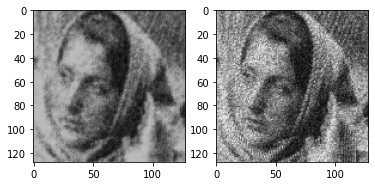

Loss is 0.008479863405227661


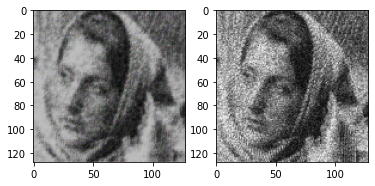

Loss is 0.008384463377296925


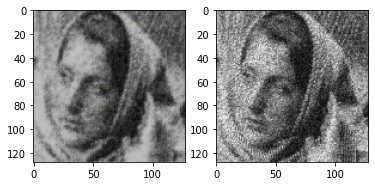

Loss is 0.00829277653247118


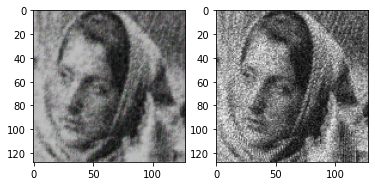

Loss is 0.008195754140615463


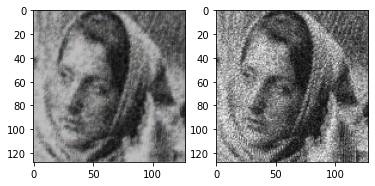

Loss is 0.008120520040392876


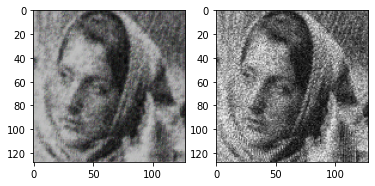

Loss is 0.008050696924328804


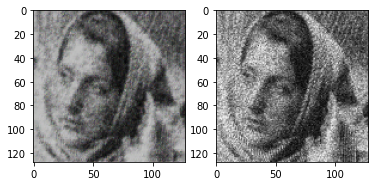

In [ ]:
for i in tqdm(range(iterations)):
  out = net(x)
  loss = criterion(out, image_tensor.unsqueeze(0))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i % 100 == 0:
    print("Loss is {}".format(loss.item()))
    plt.subplot(1, 2, 1)
    pred_np = out.squeeze(0).permute(1, 2, 0).detach().numpy()
    plt.imshow(cv2.cvtColor(pred_np, cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.close()


